<a href="https://colab.research.google.com/github/ahathaway821/COVID-19-Fact-Checking-Client/blob/master/modeling/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [0]:
df = pd.read_csv('/content/COVID-19-Fact-Checking/data/clean/Collated_data.csv')

In [5]:
df.head(20)

,RecordNumber,claim,label,source_label,source,date,claim_source,explanation,fact_check_url
0,0,"In voting by mail, “hundreds of thousands of b...",false,barely-true,Politifact,2020-06-03,J. Christian Adams,NaN,https://politifact.com/factchecks/2020/jun/09/...
1,1,“Research illustrates a clear correlation betw...,true,true,Politifact,2020-05-21,Glenn Grothman,NaN,https://politifact.com/factchecks/2020/jun/08/...
2,2,“She’s just casually carrying a body with 1 ha...,false,false,Politifact,2020-06-03,Viral image,NaN,https://politifact.com/factchecks/2020/jun/05/...
3,3,“You see suicide rates are skyrocketing now…”,false,false,Politifact,2020-05-26,Tim Murtaugh,NaN,https://politifact.com/factchecks/2020/jun/04/...
4,4,"“According to the CDC, so far this year, Flori...",false,false,Politifact,2020-05-27,Facebook posts,NaN,https://politifact.com/factchecks/2020/jun/03/...
5,5,Says Nancy Pelosi tried “once again” to includ...,false,barely-true,Politifact,2020-05-13,Bloggers,NaN,https://politifact.com/factchecks/2020/jun/02/...
6,6,“The new Dane County lockdown policy… (has) ef...,false,barely-true,Politifact,2020-05-19,Scott Manley,NaN,https://politifact.com/factchecks/2020/jun/02/...
7,7,“Two-thirds of Americans disapprove of Donald ...,true,true,Politifact,2020-05-27,Darren Jackson,NaN,https://politifact.com/factchecks/2020/jun/01/...
8,8,Says President Donald Trump “took more than a ...,partly false,mostly-true,Politifact,2020-05-21,Joe Biden,NaN,https://politifact.com/factchecks/2020/jun/01/...
9,9,"“With retail, people are moving around and you...",partly false,mostly-true,Politifact,2020-05-12,Roy Cooper,NaN,https://politifact.com/factchecks/2020/jun/01/...


In [0]:
df = df.dropna(subset=['claim', 'label'])

In [0]:
valid_labels = ['false', 'true', 'partly false', 'not enough evidence', 'partly true']
df = df[df['label'].isin(valid_labels)]

Text(0, 0.5, '# of Occurances')

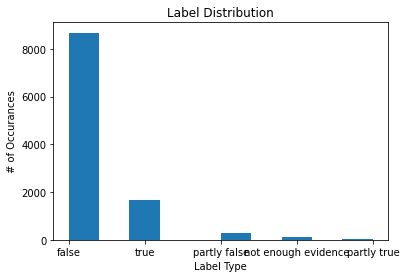

In [8]:
plt.hist(df['label'])
plt.title('Label Distribution')
plt.xlabel('Label Type')
plt.ylabel('# of Occurances')

In [0]:
train, valid = train_test_split(df, test_size=0.75, random_state=0)
train_x = train['claim']
train_y = train['label']

valid_x = valid['claim']
valid_y = valid['label']


vectorizer = CountVectorizer(strip_accents="ascii", 
                             lowercase=True, 
                             stop_words="english")

In [0]:
train_x_cv = vectorizer.fit_transform(train_x)
valid_x_cv = vectorizer.transform(valid_x)

In [0]:
naive_bayes = MultinomialNB()
naive_bayes.fit(train_x_cv, train_y)
predictions = naive_bayes.predict(valid_x_cv)

In [12]:
print("Accuracy score: ", accuracy_score(valid_y, predictions))
print("Precision score: ", precision_score(valid_y, predictions, average='macro'))
print("Recall score: ", recall_score(valid_y, predictions, average='macro'))

Accuracy score:  0.9040960277193416
Precision score:  0.36128519473543586
Recall score:  0.3556305222484168


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
df.to_csv('claims.csv')